In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [2]:
X = pd.read_csv("Logistic_X_Train.csv")
Y = pd.read_csv("Logistic_Y_Train.csv")
X_test = pd.read_csv("Logistic_X_Test.csv")

In [3]:
print(X.head(5))
print(X.info())
print(Y.head(5))
print(Y.info())
print(Y.shape)
print(X.shape)

         f1        f2
0  0.574727  0.787277
1  0.251502  0.908940
2  1.860578  0.013763
3  0.019477  1.047210
4  0.029794  0.252236
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 2 columns):
f1    2250 non-null float64
f2    2250 non-null float64
dtypes: float64(2)
memory usage: 35.2 KB
None
   label
0      0
1      0
2      1
3      0
4      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 1 columns):
label    2250 non-null int64
dtypes: int64(1)
memory usage: 17.7 KB
None
(2250, 1)
(2250, 2)


In [4]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [5]:
model = Sequential()
model.add(Dense(4,activation='relu',input_shape=(2,)))
model.add(Dropout(0.24))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

W0906 18:58:12.341346 139676193113920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 18:58:12.388448 139676193113920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 18:58:12.390717 139676193113920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 18:58:12.426342 139676193113920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0906 18:58:12.441455 

In [6]:
hist = model.fit(X_train,y_train,epochs=250,batch_size=500)

Epoch 1/250
1575/1575 [==============================] - 0s 169us/step - loss: 0.6402 - acc: 0.5187
Epoch 2/250
1575/1575 [==============================] - 0s 10us/step - loss: 0.6360 - acc: 0.5556
Epoch 3/250
1575/1575 [==============================] - 0s 8us/step - loss: 0.6327 - acc: 0.6114
Epoch 4/250
1575/1575 [==============================] - 0s 8us/step - loss: 0.6324 - acc: 0.6140
Epoch 5/250
1575/1575 [==============================] - 0s 14us/step - loss: 0.6287 - acc: 0.6400
Epoch 6/250
1575/1575 [==============================] - 0s 14us/step - loss: 0.6273 - acc: 0.6406
Epoch 7/250
1575/1575 [==============================] - 0s 14us/step - loss: 0.6252 - acc: 0.6476
Epoch 8/250
1575/1575 [==============================] - 0s 14us/step - loss: 0.6250 - acc: 0.6635
Epoch 9/250
1575/1575 [==============================] - 0s 17us/step - loss: 0.6212 - acc: 0.6705
Epoch 10/250
1575/1575 [==============================] - 0s 15us/step - loss: 0.6216 - acc: 0.6413
Epoch 11/2

1575/1575 [==============================] - 0s 6us/step - loss: 0.4220 - acc: 0.8457
Epoch 165/250
1575/1575 [==============================] - 0s 9us/step - loss: 0.4230 - acc: 0.8406
Epoch 166/250
1575/1575 [==============================] - 0s 11us/step - loss: 0.4230 - acc: 0.8400
Epoch 167/250
1575/1575 [==============================] - 0s 10us/step - loss: 0.4152 - acc: 0.8489
Epoch 168/250
1575/1575 [==============================] - 0s 7us/step - loss: 0.4163 - acc: 0.8495
Epoch 169/250
1575/1575 [==============================] - 0s 7us/step - loss: 0.4186 - acc: 0.8476
Epoch 170/250
1575/1575 [==============================] - 0s 9us/step - loss: 0.4120 - acc: 0.8502
Epoch 171/250
1575/1575 [==============================] - 0s 5us/step - loss: 0.4072 - acc: 0.8533
Epoch 172/250
1575/1575 [==============================] - 0s 9us/step - loss: 0.4173 - acc: 0.8444
Epoch 173/250
1575/1575 [==============================] - 0s 12us/step - loss: 0.4094 - acc: 0.8495
Epoch 174/2

Text(0.5, 0, 'epochs')

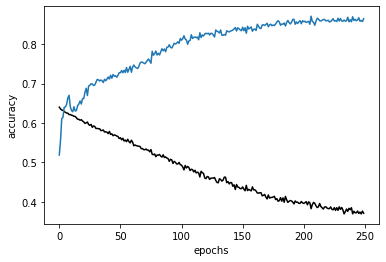

In [7]:
h = hist.history
plt.plot(h['loss'],label="Training loss",color='black')
plt.plot(h['acc'],label="Training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")

In [8]:
model.evaluate(X_test,y_test)

675/675 [==============================] - 0s 92us/step


[0.31735971415484393, 0.9007407407407407]

In [9]:
output = model.predict(X_test)


In [10]:
output.shape

(675, 1)

In [25]:
l=[]

for val in output:
    if val>0.5:
        s = 1
        l.append(s)
    else:
        s = 0
        l.append(s)
        

In [26]:
print(l)

[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 

In [33]:
df = pd.DataFrame({'labels':l})
df.to_csv('output.csv',index=False)
